In [2]:
from tensorflow import keras

I0000 00:00:1746131552.013533      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


✅ Model loaded.
Found 7178 images belonging to 7 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1746131557.136486      91 service.cc:148] XLA service 0x79069000bd80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746131557.137321      91 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1746131557.250571      91 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/113 ━━━━━━━━━━━━━━━━━━━━ 3:33 2s/step

I0000 00:00:1746131558.638364      91 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


113/113 ━━━━━━━━━━━━━━━━━━━━ 24s 199ms/step


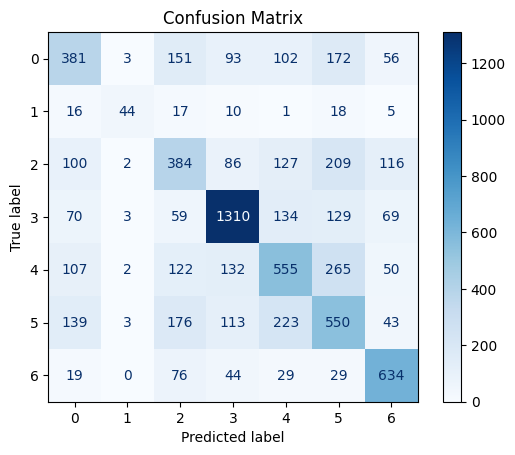

In [3]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import numpy as np
import json

# Emotion label dictionary
emotion_dict = {
    0: "Angry", 1: "Disgusted", 2: "Fearful",
    3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"
}

# Load model
with open('/kaggle/input/result/model.json', 'r') as f:
    model = model_from_json(f.read())
model.load_weights('/kaggle/input/result/model.weights.h5')
print("✅ Model loaded.")

# Load test data
test_gen = ImageDataGenerator(rescale=1. / 255)
test_data = test_gen.flow_from_directory(
    '/kaggle/input/fer2013/test',  # Replace with uploaded folder
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False
)

# Predict
predictions = model.predict(test_data)
y_pred = predictions.argmax(axis=1)
y_true = test_data.classes

# Save predictions
np.save('/kaggle/working/y_pred.npy', y_pred)
np.save('/kaggle/working/y_true.npy', y_true)

# Save report
report = classification_report(y_true, y_pred, output_dict=True)
with open('/kaggle/working/classification_report.json', 'w') as f:
    json.dump(report, f)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.savefig('/kaggle/working/confusion_matrix.png')
plt.show()


In [4]:
!zip -r /kaggle/working/working_dir_backup.zip /kaggle/working/

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/classification_report.json (deflated 64%)
  adding: kaggle/working/y_pred.npy (deflated 93%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
  adding: kaggle/working/y_true.npy (deflated 99%)
  adding: kaggle/working/confusion_matrix.png (deflated 7%)
